In [1]:
import torch_geometric
from torch_geometric.datasets import ModelNet

# Set the path where you want to store/download the dataset
dataset_path = "../../dataset/ModelNet"

# Initialize the dataset
modelnet_dataset = ModelNet(root=dataset_path, name='40', train=True) # 40)

In [2]:
print(modelnet_dataset)
print(modelnet_dataset[100])

classes = ['airplane', 'bathtub', 'bed', 'bench', 'bookshelf',
           'bottle', 'bowl', 'car', 'chair', 'cone', 'cup',
           'curtain', 'desk', 'door', 'dresser', 'plower_pot',
           'glass_box', 'guitar', 'keyboard', 'lamp', 'laptop',
           'mantel', 'monitor', 'night_stand', 'person',
           'piano', 'plant', 'radio', 'range_hood', 'sink',
           'sofa', 'stairs', 'stool', 'table', 'tent', 'toilet',
           'tv_stand', 'vase', 'wardrobe', 'xbox']

ModelNet40(9843)
Data(pos=[30027, 3], face=[3, 34520], y=[1])


In [3]:
import open3d as o3d
import numpy as np
import converters

def random_index():
    return np.random.randint(0, len(modelnet_dataset))


def get_mesh(index, print_info=False):
    data = modelnet_dataset[index]

    if print_info:
        print(data)
        print(index)

    # Convert to numpy arrays
    vertices = data.pos.numpy()
    faces = data.face.numpy().T  # Transpose to align with Open3D's expectations

    # Create Open3D mesh
    mesh = o3d.geometry.TriangleMesh()
    mesh.vertices = o3d.utility.Vector3dVector(vertices)
    mesh.triangles = o3d.utility.Vector3iVector(faces)
    mesh = converters.normolize_mesh(mesh)


    return mesh

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [35]:
import converters

ri = random_index()
mesh = get_mesh(ri, True)
mesh.scale(1 / np.max(mesh.get_max_bound() - mesh.get_min_bound()),
               center=mesh.get_center())

voxel_size = min(mesh.get_max_bound() - mesh.get_min_bound()) / 100

voxel = converters.mesh_to_voxel(mesh, voxel_size)
graph = converters.mesh_to_graph(mesh)

print(classes[modelnet_dataset[ri].y])
o3d.visualization.draw_geometries([mesh])

Data(pos=[15980, 3], face=[3, 14824], y=[1])
1704
bookshelf


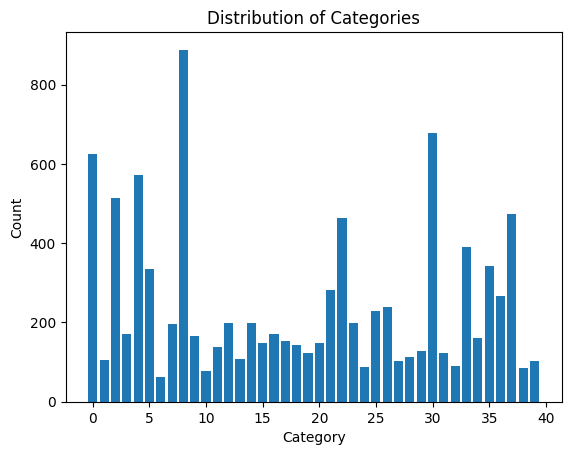

In [36]:
import visualization
from importlib import reload
reload(visualization)

v = visualization.class_distribution(modelnet_dataset, lambda data: data.y.item())

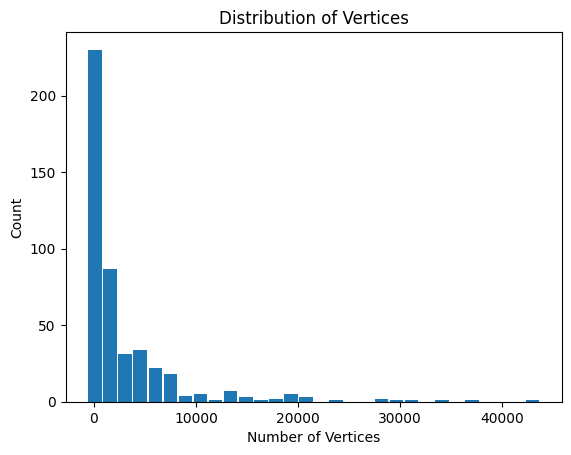

3675.0303687635574
461
(461,)


In [40]:
from importlib import reload
reload(visualization)

import numpy as np

# v = visualization.vertices_distribution(modelnet_dataset,
#                     lambda data: data.pos.shape[0] < 5000)

CLASS = 22
v = visualization.vertices_distribution_in_class(modelnet_dataset,
                    lambda data: data.y.item() == CLASS and data.pos.shape[0] < 50000)

rr = np.asarray(v)

print(np.mean(rr))
print((rr < 150000).sum())
print(rr.shape)

In [5]:
import sys
sys.path.insert(1, '../../database/')
# sys.path.append(DATA_PATH)


import db_operations

import converters
import importlib
importlib.reload(db_operations)

def load_to_db(meshes_data):
    db = db_operations.DataBaseOperations()

    for i, data in enumerate(meshes_data):
        try:
            mesh = get_mesh(i, False)
            mesh = converters.normolize_mesh(mesh)
            graph = converters.mesh_to_graph(mesh)
            class_name = classes[data.y]
            # voxel = converters.mesh_to_voxel(mesh)
            db.add_mesh_data(class_name, 'modelnet', mesh, graph)
        except Exception as e:
            print('Error', e)
        
    del db

load_to_db(modelnet_dataset)

6 59968 224001 74667 0 /home/alexey/projects/3d_mesh_neural_network/dataset/custom_collection/meshes/c633c528-e1b9-40c8-b366-3e173c3e5f77.ply /home/alexey/projects/3d_mesh_neural_network/dataset/custom_collection/graphs/c633c528-e1b9-40c8-b366-3e173c3e5f77.pt - 2
6 15977 60891 20297 0 /home/alexey/projects/3d_mesh_neural_network/dataset/custom_collection/meshes/768ecd1b-f447-4cae-baec-c997e9a5fe1f.ply /home/alexey/projects/3d_mesh_neural_network/dataset/custom_collection/graphs/768ecd1b-f447-4cae-baec-c997e9a5fe1f.pt - 2
6 21217 70857 23619 0 /home/alexey/projects/3d_mesh_neural_network/dataset/custom_collection/meshes/e0d00868-c7cc-4dbf-84bb-bacf915d604d.ply /home/alexey/projects/3d_mesh_neural_network/dataset/custom_collection/graphs/e0d00868-c7cc-4dbf-84bb-bacf915d604d.pt - 2
6 77064 243450 81150 0 /home/alexey/projects/3d_mesh_neural_network/dataset/custom_collection/meshes/0f480220-2c04-45fe-98c9-c4f569d56e0a.ply /home/alexey/projects/3d_mesh_neural_network/dataset/custom_collecti